In [6]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.cluster import KMeans
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

# # class clust():
#     def _load_data(self, sklearn_load_ds):
#         data = sklearn_load_ds
#         X = pd.DataFrame(data.data)
#         self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data.target, test_size=0.3, random_state=42)
        
        
#     def __init__(self, sklearn_load_ds):
#         self._load_data(sklearn_load_ds)
    
    
#     def classify(self, model=LogisticRegression(random_state=42)):
#         model.fit(self.X_train, self.y_train)
#         y_pred = model.predict(self.X_test)
#         print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


#     def Kmeans(self, output='add'):
#         n_clusters = len(np.unique(self.y_train))
#         clf = KMeans(n_clusters = n_clusters, random_state=42)
#         clf.fit(self.X_train)
#         y_labels_train = clf.labels_
#         y_labels_test = clf.predict(self.X_test)
#         if output == 'add':
#             self.X_train['km_clust'] = y_labels_train
#             self.X_test['km_clust'] = y_labels_test
#         elif output == 'replace':
#             self.X_train = y_labels_train[:, np.newaxis]
#             self.X_test = y_labels_test[:, np.newaxis]
#         else:
#             raise ValueError('output should be either add or replace')
#         return self

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
# for plotting the ROC Curve
from sklearn.metrics import roc_curve, auc

In [2]:
#Reading a dataset
data = pd.read_csv('data_test_two.csv')
data = data.drop(['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20'],axis=1)
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate']
#data.shape
data = data.drop(['Filename'],axis=1) #Filename is not required
data.head()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,label
0,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,blues
1,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,blues
2,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,blues
3,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,blues
4,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,blues


In [3]:
data.shape

(1000, 10)

In [4]:
data.isna().any()

Chromagram             False
RootMeanSquare         False
LowEnergyBrightness    False
SpectralCentroid       False
Flatness               False
Bandwidth              False
InHarmonicity          False
Rolloff                False
ZeroCrossingRate       False
label                  False
dtype: bool

In [5]:
def plot_features(data):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualizing The Features Distribution', y=0.95)

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    data.Chromagram.plot(kind='hist', color='brown')
    plt.xlabel('Chromagram')
    plt.ylabel('Frequency')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    data.RootMeanSquare.plot(kind='hist', color='brown')
    plt.xlabel('RootMeanSquare')
    plt.ylabel('Frequency')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    data.LowEnergyBrightness.plot(kind='hist', color='brown')
    plt.xlabel('LowEnergyBrightness')
    plt.ylabel('Frequency')

    plt.subplot(244)
    color_list = ['gold','purple','brown']
    data.SpectralCentroid.plot(kind='hist', color='brown')
    plt.xlabel('SpectralCentroid')
    plt.ylabel('Frequency')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    data.Flatness.plot(kind='hist', color='brown')
    plt.xlabel('Flatness')
    plt.ylabel('Frequency')

    plt.subplot(246)
    color_list = ['gold','purple','brown']
    data.Bandwidth.plot(kind='hist', color='brown')
    plt.xlabel('Bandwidth')
    plt.ylabel('Frequency')


    plt.subplot(247)
    color_list = ['gold','purple','brown']
    data.InHarmonicity.plot(kind='hist', color='brown')
    plt.xlabel('InHarmonicity')
    plt.ylabel('Frequency')

    plt.subplot(248)
    color_list = ['gold','purple','brown']
    data.Rolloff.plot(kind='hist', color='brown')
    plt.xlabel('Rolloff')
    plt.ylabel('Frequency')
    
#     plt.subplot(249)
#     color_list = ['gold','purple','brown']
#     data.ZeroCrossingRate.plot(kind='hist', color='brown')
#     plt.xlabel('ZeroCrossingRate')
#     plt.ylabel('Frequency')

    plt.show()

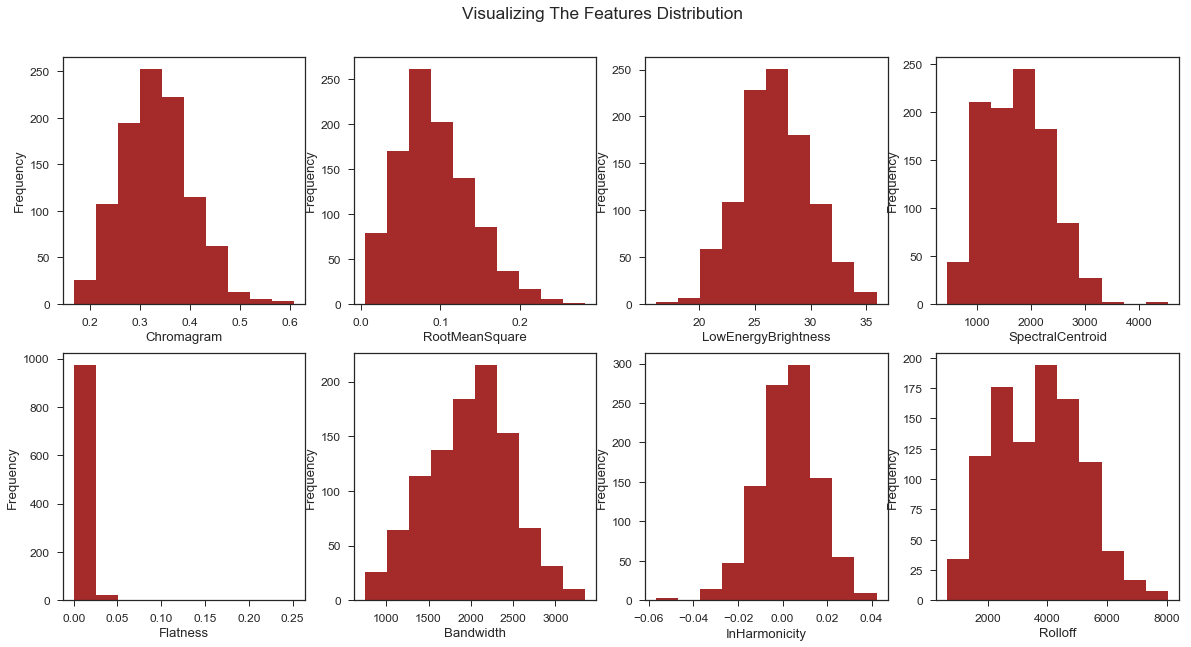

In [6]:
plot_features(data)

In [7]:
# for i in data.columns:
#     if i in ['Chromagram', 'RootMeanSquare', 'SpectralCentroid', 'InHarmonicity']:
#         print(i)
#         data[i] = data[i].apply(np.log)

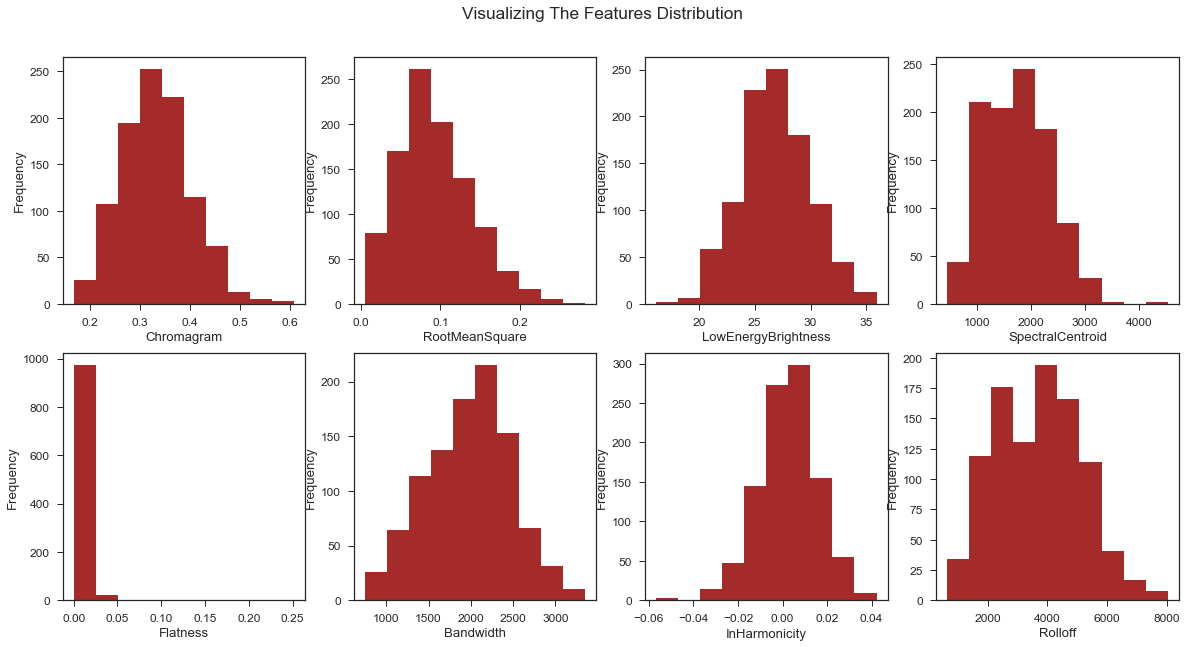

In [8]:
plot_features(data)

In [9]:
data.shape

(1000, 10)

In [10]:
data.isna().sum()

Chromagram             0
RootMeanSquare         0
LowEnergyBrightness    0
SpectralCentroid       0
Flatness               0
Bandwidth              0
InHarmonicity          0
Rolloff                0
ZeroCrossingRate       0
label                  0
dtype: int64

In [11]:
for i in data.columns[:-2]:
    mean = data[i].mean()
    std = data[i].std()
    mini = data[i].min()
    maxi = data[i].max()
    
    # if columns are not Age or Pregnancies, apply the Z_score norm method
    if i not in ['Chromagram', 'Rolloff']:
        data[i] = data[i].apply(lambda x: (x - mean) / std)
    
    # Else if columns are either Age or Pregnancies, then apply the Min-Max norm method
    else:
        data[i] = data[i].apply(lambda x: (x - mini) / (maxi - mini))

In [12]:
data.head()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,label
0,0.317922,-0.237869,0.193120,-0.368518,-0.329553,-0.309940,-0.102986,0.341977,0.070382,blues
1,0.302273,-0.626503,0.338145,-0.958825,-0.383889,-0.537681,1.242052,0.240390,0.044440,blues
2,0.290634,0.608903,0.594269,-0.750037,-0.377494,-0.822455,1.607702,0.248045,0.064787,blues
3,0.477946,0.528231,0.075370,-1.643396,-0.404006,-1.414984,0.047112,0.100382,0.024863,blues
4,0.211573,-0.707114,0.643554,-0.356499,-0.347609,-0.810590,-4.031664,0.312638,0.085609,blues


In [13]:
data.Chromagram.value_counts()

0.428037    2
0.403689    2
0.461317    2
0.484145    2
0.452957    2
0.459524    2
0.551650    2
0.399887    2
0.620548    2
0.409173    2
0.564571    2
0.509292    2
0.435026    2
0.538422    2
0.263962    1
0.220653    1
0.186702    1
0.147845    1
0.404273    1
0.349500    1
0.440285    1
0.285384    1
0.238341    1
0.498879    1
0.075617    1
0.620740    1
0.543385    1
0.524480    1
0.398785    1
0.314952    1
           ..
0.226922    1
0.667368    1
0.267011    1
0.560333    1
0.346694    1
0.381248    1
0.129408    1
0.390515    1
0.656363    1
0.433014    1
0.424447    1
0.393640    1
0.306179    1
0.620159    1
0.265715    1
0.397216    1
0.655519    1
0.500302    1
0.264699    1
0.364210    1
0.372608    1
0.228330    1
0.610338    1
0.450126    1
0.419467    1
0.637753    1
0.500468    1
0.459639    1
0.345146    1
0.000000    1
Name: Chromagram, Length: 986, dtype: int64

In [14]:
# feature_matrix = diabetes_doctor_df.iloc[:,1:-2]
# feature_matrix.head()
feature_matrix = data
feature_matrix.head()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,label
0,0.317922,-0.237869,0.193120,-0.368518,-0.329553,-0.309940,-0.102986,0.341977,0.070382,blues
1,0.302273,-0.626503,0.338145,-0.958825,-0.383889,-0.537681,1.242052,0.240390,0.044440,blues
2,0.290634,0.608903,0.594269,-0.750037,-0.377494,-0.822455,1.607702,0.248045,0.064787,blues
3,0.477946,0.528231,0.075370,-1.643396,-0.404006,-1.414984,0.047112,0.100382,0.024863,blues
4,0.211573,-0.707114,0.643554,-0.356499,-0.347609,-0.810590,-4.031664,0.312638,0.085609,blues


In [15]:
feature_matrix.shape

(1000, 10)

In [16]:
label = data.label
label.head()

0    blues
1    blues
2    blues
3    blues
4    blues
Name: label, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, label, test_size=0.1, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (900, 10)
X_test shape is (100, 10)
y_train shape is (900,)
y_test shape is (100,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [35]:
# from sklearn.metrics import classification_report


# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [37]:
# def plot_roc_chart(model):
#      # calculate the fpr and tpr for all thresholds of the classification
#     probs = model.predict_proba(X_test)
#     preds = probs[:,1]
#     fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#     roc_auc = metrics.auc(fpr, tpr)

#     # method I: plt
#     plt.figure(figsize=(8,6))
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
#     return probs

In [39]:
# decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
# decision_tree_classifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[features], test_size=0.1, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (900, 9)
X_test shape is (100, 9)
y_train shape is (900, 9)
y_test shape is (100, 9)


In [23]:
# from sklearn.metrics import confusion_matrix 
# from sklearn.metrics import accuracy_score 
# from sklearn.metrics import classification_report 

# olddata = X_train
# newdata = y_train
# print(olddata)
# print(newdata)

In [36]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

classifier = svm.SVC(kernel='linear', C=0.1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Automatically created module for IPython interactive environment


ValueError: bad input shape (900, 9)